In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import os
import glob
count1 =0
print('Diabetes ECG Data :\n\n')

for dirname, _, filenames in os.walk('D1NAMO\diabetes_subset'):
    for filename in filenames:
#         print(dirname  )
        if filename.endswith("ECG.csv"):
            count1 +=1
            print(count1,os.path.join(dirname,filename))
count2 =0 
print('\nHealthy ECG Data :\n\n')
for dirname, _, filenames in os.walk('D1NAMO\healthy_subset'):
    
    for filename in filenames:
#         print(dirname  )
        if filename.endswith("ECG.csv"):
            count2 +=1
            print(count2,os.path.join(dirname,filename))
print(f'\n\nTotal Healthy ECG samples : {count2}\nTotal Unhealthy (Diabetic) ECG samples : {count1}')

Diabetes ECG Data :


1 D1NAMO\diabetes_subset\001\sensor_data\2014_10_01-10_09_39\2014_10_01-10_09_39_ECG.csv
2 D1NAMO\diabetes_subset\001\sensor_data\2014_10_02-10_56_44\2014_10_02-10_56_44_ECG.csv
3 D1NAMO\diabetes_subset\001\sensor_data\2014_10_03-06_36_24\2014_10_03-06_36_24_ECG.csv
4 D1NAMO\diabetes_subset\001\sensor_data\2014_10_04-06_34_57\2014_10_04-06_34_57_ECG.csv
5 D1NAMO\diabetes_subset\002\sensor_data\2014_10_01-12_35_54\2014_10_01-12_35_54_ECG.csv
6 D1NAMO\diabetes_subset\002\sensor_data\2014_10_01-20_29_57\2014_10_01-20_29_57_ECG.csv
7 D1NAMO\diabetes_subset\002\sensor_data\2014_10_02-06_44_21\2014_10_02-06_44_21_ECG.csv
8 D1NAMO\diabetes_subset\002\sensor_data\2014_10_03-06_33_20\2014_10_03-06_33_20_ECG.csv
9 D1NAMO\diabetes_subset\002\sensor_data\2014_10_03-14_06_08\2014_10_03-14_06_08_ECG.csv
10 D1NAMO\diabetes_subset\002\sensor_data\2014_10_04-07_01_03\2014_10_04-07_01_03_ECG.csv
11 D1NAMO\diabetes_subset\002\sensor_data\2014_10_04-17_43_12\2014_10_04-17_43_12_ECG.c

In [3]:
df = pd.read_csv('D1NAMO\\diabetes_subset\\007\\sensor_data\\2014_10_01-08_42_43\\2014_10_01-08_42_43_ECG.csv')
df_s = df[600000:601000]
df_s.head()

,Time,EcgWaveform
600000,01/10/2014 09:22:43.435,2182
600001,01/10/2014 09:22:43.439,2194
600002,01/10/2014 09:22:43.443,2141
600003,01/10/2014 09:22:43.447,2040
600004,01/10/2014 09:22:43.451,1926


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks
from scipy.stats import skew, kurtosis

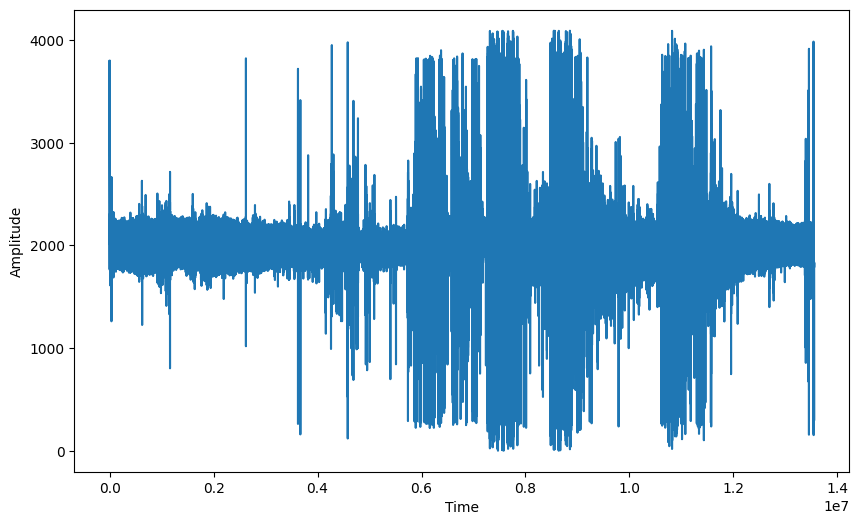

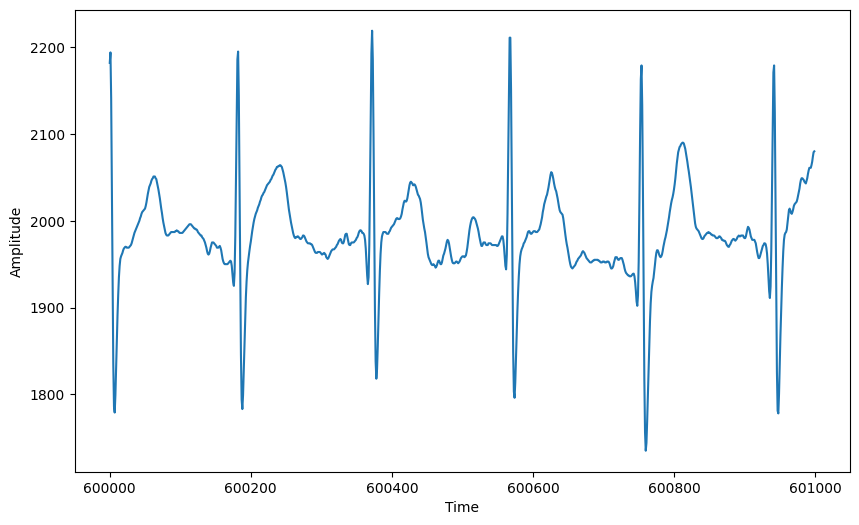

In [5]:
plt.figure(figsize=(10,6))
plt.plot(df["EcgWaveform"])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(df_s["EcgWaveform"])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

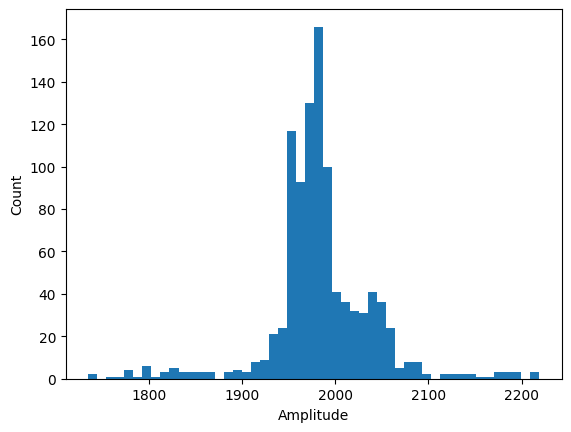

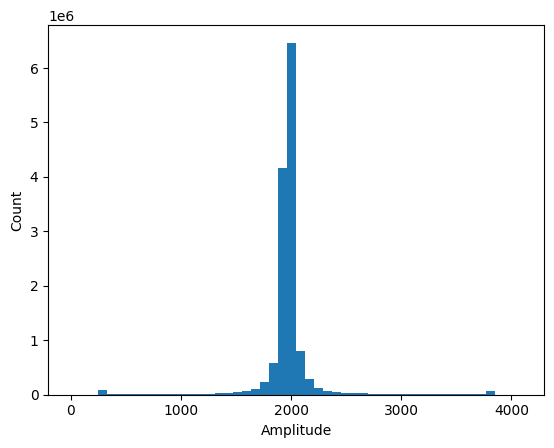

In [6]:
plt.hist(df_s["EcgWaveform"], bins=50)
plt.xlabel("Amplitude")
plt.ylabel("Count")
plt.show()

plt.hist(df["EcgWaveform"], bins=50)
plt.xlabel("Amplitude")
plt.ylabel("Count")
plt.show()

In [7]:
def get_features(df):
    mean = np.mean(df["EcgWaveform"])
    std = np.std(df["EcgWaveform"])
    skewness = skew(df["EcgWaveform"])
    kurt = kurtosis(df["EcgWaveform"])
    peaks, _ = find_peaks(df["EcgWaveform"], height=0)
    heart_rate = len(peaks) / (df.shape[0] / 3600)
    features = pd.DataFrame({"mean": [mean],
                             "std": [std],
                             "skewness": [skewness],
                             "kurtosis": [kurt],
                             "heart_rate": [heart_rate]})
    return features
features_all = get_features(df)
features_s = get_features(df_s)
f = pd.concat([features_all,features_s])
f.head()

,mean,std,skewness,kurtosis,heart_rate
0,1975.250137,263.175535,0.317573,27.487551,173.493784
0,1983.975000,55.337676,-0.096791,4.745466,201.600000


In [8]:
features_all.iloc[0]

mean          1975.250137
std            263.175535
skewness         0.317573
kurtosis        27.487551
heart_rate     173.493784
Name: 0, dtype: float64

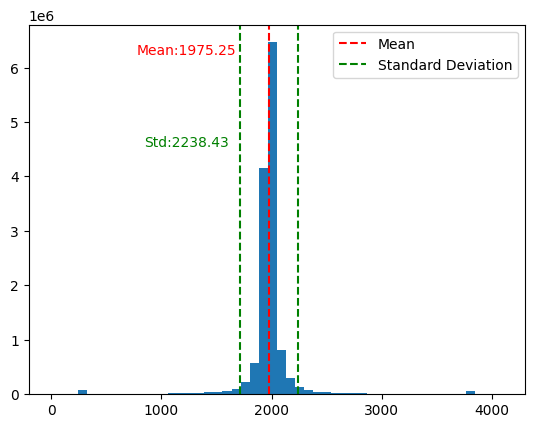

In [9]:
def get_hist_withfeatues(features_all,df,x):
    mean , std, skewness , kurtosis , heart_rate = features_all.iloc[0]
    plt.hist(df["EcgWaveform"], bins=50)
    plt.axvline(mean, color='r', linestyle='--', label='Mean')
    plt.axvline(mean+std, color='g', linestyle='--', label='Standard Deviation')
    plt.axvline(mean-std, color='g', linestyle='--')

    plt.text(mean-x, plt.ylim()[1]*0.95, 'Mean:{:.2f}'.format(mean), color='r', ha='center', va='top')
    plt.text(mean-std-100, plt.ylim()[1]*0.7, 'Std:{:.2f}'.format(mean+std), color='g', ha='right', va='top')
    # plt.text(mean-std, plt.ylim()[1]*0.9, 'Mean - SD: {:.2f}'.format(mean-std), color='g', ha='left', va='top')
    # Add a legend and display the plot
    plt.legend()
    plt.show()
get_hist_withfeatues(features_all,df,x=750)

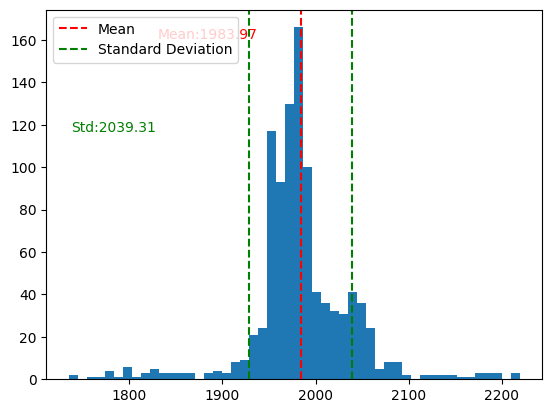

In [10]:
get_hist_withfeatues(features_s,df_s,x= 100)

In [11]:
!pip install git+https://github.com/berndporr/py-ecg-detectors.git

  ERROR: Error [WinError 2] The system cannot find the file specified while executing command git version
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Cloning https://github.com/berndporr/py-ecg-detectors.git to c:\users\chanc\appdata\local\temp\pip-req-build-gv6oqcpx


In [12]:
df

,Time,EcgWaveform
0,01/10/2014 08:42:43.435,3798
1,01/10/2014 08:42:43.439,3798
2,01/10/2014 08:42:43.443,3798
3,01/10/2014 08:42:43.447,3798
4,01/10/2014 08:42:43.451,3798
...,...,...
13553495,01/10/2014 23:46:17.415,1831
13553496,01/10/2014 23:46:17.419,1831
13553497,01/10/2014 23:46:17.423,1831
13553498,01/10/2014 23:46:17.427,1830


In [13]:
from scipy.signal import butter, filtfilt
def detect_r_peaks(ecg_signal, fs):
    """
    Detect R-peaks from an ECG signal using a bandpass filter and a peak detection algorithm.
    Return the index of the R-peaks.
    
    Parameters:
    ecg_signal (array-like): An array-like object with the ECG signal.
    fs (float): The sampling frequency of the ECG signal.
    
    Returns:
    np.ndarray: An array with the indices of the R-peaks.
    """
    # Set up the filter
    nyquist_freq = 0.5 * fs
    low_cut = 5 / nyquist_freq
    high_cut = 15 / nyquist_freq
    b, a = butter(2, [low_cut, high_cut], btype='band')
    
    # Apply the filter
    filtered_ecg_signal = filtfilt(b, a, ecg_signal)
    
    # Detect the R-peaks
    r_peaks, _ = find_peaks(filtered_ecg_signal, distance=int(0.2 * fs), height=0.2, prominence=0.2)
    
    return r_peaks

# Function to calculate heart rate from ECG signal
def calculate_heart_rate(ecg_signal, fs):
    # Apply bandpass filter to remove unwanted frequencies
    b, a = signal.butter(4, [1, 40], btype='band', fs=fs)
    filtered_ecg_signal = signal.filtfilt(b, a, ecg_signal)
    
    # Detect R-peaks using a peak detector
    from ecgdetectors import Detectors
    detectors = Detectors(fs)
    r_peaks = detectors.pan_tompkins_detector(filtered_ecg_signal)
    
    # Calculate heart rate in beats per minute
    heart_rate = (len(r_peaks) - 1) / (len(ecg_signal) / fs / 60)
    
    return heart_rate

# Function to detect QRS complex and QRS peaks from ECG signal
def detect_qrs(ecg_signal, fs):
    # Apply bandpass filter to remove unwanted frequencies
    b, a = signal.butter(4, [5, 15], btype='band', fs=fs)
    filtered_ecg_signal = signal.filtfilt(b, a, ecg_signal)
    
    # Detect R-peaks using a peak detector
    from ecgdetectors import Detectors
    detectors = Detectors(fs)
    r_peaks = detectors.pan_tompkins_detector(filtered_ecg_signal)
    
    # Detect QRS complex
    qrs_complex = []
    for i in range(len(r_peaks) - 1):
        qrs_start = r_peaks[i] - int(fs * 0.1)
        qrs_end = r_peaks[i+1] + int(fs * 0.1)
        qrs_complex.append(filtered_ecg_signal[qrs_start:qrs_end])
    
    # Detect QRS peaks in each QRS complex
    qrs_peaks = []
    for complex in qrs_complex:
        qrs_peak_index = np.argmax(complex) + np.where(filtered_ecg_signal == complex[0])[0][0]
        qrs_peaks.append(qrs_peak_index)
    
    return qrs_complex, qrs_peaks

In [14]:
# Calculate time interval between adjacent samples
df["Time"] = pd.to_datetime(df["Time"])
time_diff = df["Time"].diff().median().total_seconds()

# Calculate sampling rate as inverse of time interval
fs = int(round(1.0 / time_diff))
fs

250

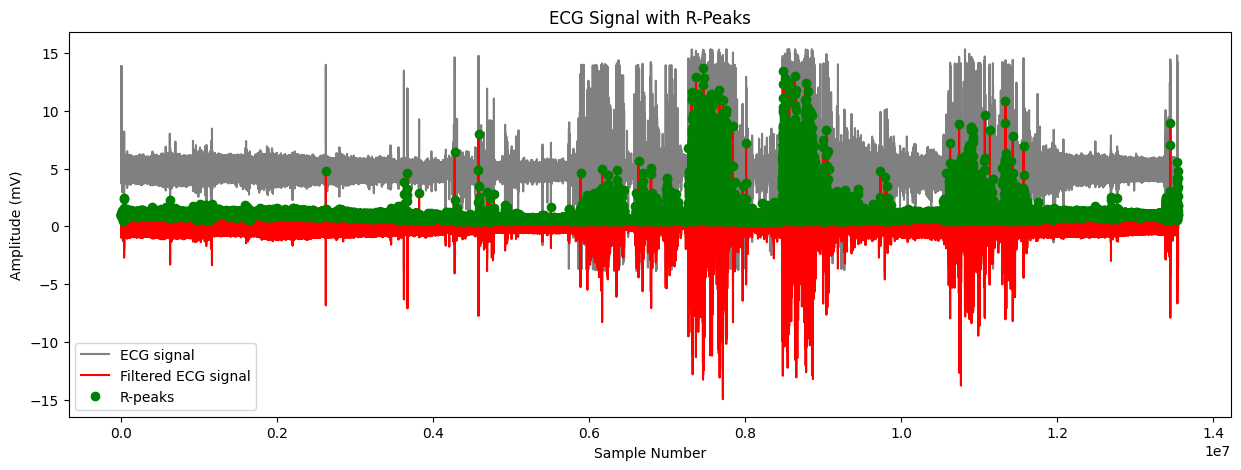

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, filtfilt

# Load ECG data from CSV file
# df = pd.read_csv('ecg_data.csv')

# Preprocessing
fs = 250  # Sampling rate
lowcut = 3  # Lower frequency of bandpass filter
highcut = 45  # Higher frequency of bandpass filter

# Convert ECG signal to mV
ecg_signal = (df['EcgWaveform'].values.astype(float) - 1024) / 200

# Apply bandpass filter
nyquist_rate = fs / 2.0
low = lowcut / nyquist_rate
high = highcut / nyquist_rate
b, a = butter(2, [low, high], btype='band')
ecg_cleaned = filtfilt(b, a, ecg_signal)

# Find R-peaks
r_peaks, _ = find_peaks(ecg_cleaned, height=0.5, distance=fs * 0.3)

# Plot ECG signal with R-peaks
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ecg_signal, color='gray', label='ECG signal')
ax.plot(ecg_cleaned, color='red', label='Filtered ECG signal')
ax.plot(r_peaks, ecg_cleaned[r_peaks], "go", label="R-peaks")
ax.set_title("ECG Signal with R-Peaks")
ax.set_xlabel("Sample Number")
ax.set_ylabel("Amplitude (mV)")
ax.legend()
plt.show()

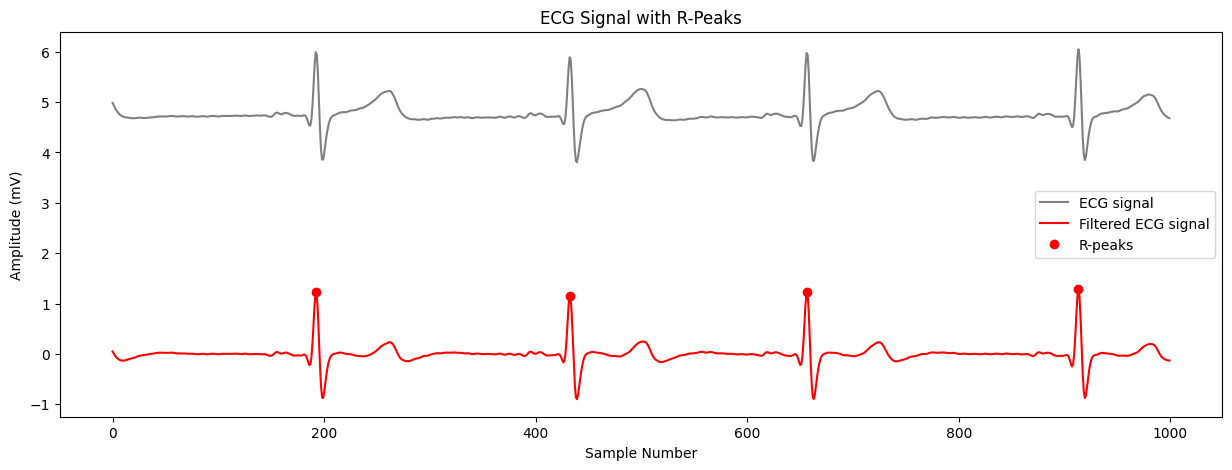

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, filtfilt


def detect_r_peaks(df, sample_range):
    # Preprocessing
    fs = 250  # Sampling rate
    lowcut = 3  # Lower frequency of bandpass filter
    highcut = 45  # Higher frequency of bandpass filter

    # Convert ECG signal to mV
    ecg_signal = (df['EcgWaveform'].values.astype(float) - 1024) / 200

    # Apply bandpass filter
    nyquist_rate = fs / 2.0
    low = lowcut / nyquist_rate
    high = highcut / nyquist_rate
    b, a = butter(2, [low, high], btype='band')
    ecg_cleaned = filtfilt(b, a, ecg_signal)

    # Find R-peaks
    r_peaks, _ = find_peaks(ecg_cleaned, height=0.5, distance=fs * 0.3)

    # Select R-peaks within the specified sample range
    r_peaks_in_range = r_peaks[(r_peaks > sample_range[0]) & (r_peaks < sample_range[1])]

    # Plot ECG signal with R-peaks
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(ecg_signal[sample_range[0]:sample_range[1]], color='gray', label='ECG signal')
    ax.plot(ecg_cleaned[sample_range[0]:sample_range[1]], color='red', label='Filtered ECG signal')
    ax.plot(r_peaks_in_range - sample_range[0], ecg_cleaned[r_peaks_in_range], "ro", label="R-peaks")
    ax.set_title("ECG Signal with R-Peaks")
    ax.set_xlabel("Sample Number")
    ax.set_ylabel("Amplitude (mV)")
    ax.legend()
    plt.show()
detect_r_peaks(df, [60000, 61000])

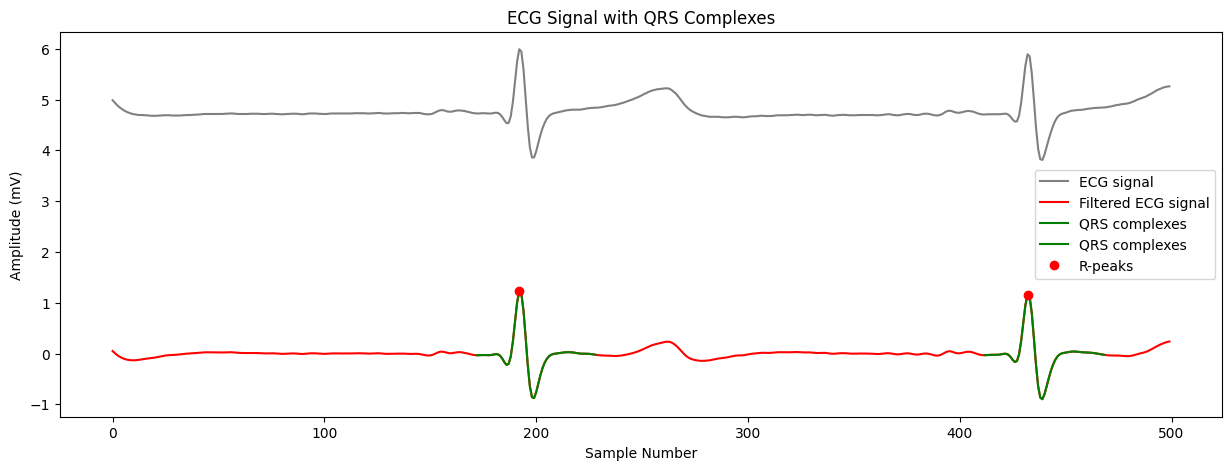

In [17]:
def detect_qrs_complexes(df, sample_range):
    # Preprocessing
    fs = 250  # Sampling rate
    lowcut = 3  # Lower frequency of bandpass filter
    highcut = 45  # Higher frequency of bandpass filter

    # Convert ECG signal to mV
    ecg_signal = (df['EcgWaveform'].values.astype(float) - 1024) / 200

    # Apply bandpass filter
    nyquist_rate = fs / 2.0
    low = lowcut / nyquist_rate
    high = highcut / nyquist_rate
    b, a = butter(2, [low, high], btype='band')
    ecg_cleaned = filtfilt(b, a, ecg_signal)

    # Find R-peaks
    r_peaks, _ = find_peaks(ecg_cleaned, height=0.5, distance=fs * 0.3)

    # Select R-peaks within the specified sample range
    r_peaks_in_range = r_peaks[(r_peaks > sample_range[0]) & (r_peaks < sample_range[1])]

    # Find QRS complexes
    qrs_start = r_peaks_in_range - int(0.08 * fs)
    qrs_end = r_peaks_in_range + int(0.15 * fs)
    qrs_start[qrs_start < 0] = 0
    qrs_end[qrs_end >= len(ecg_cleaned)] = len(ecg_cleaned) - 1
    qrs_amplitudes = ecg_cleaned[r_peaks_in_range]
    qrs_complexes = []
    for i in range(len(qrs_start)):
        qrs = ecg_cleaned[qrs_start[i]:qrs_end[i]]
        qrs_complexes.append(qrs)

    # Plot ECG signal with QRS complexes
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(ecg_signal[sample_range[0]:sample_range[1]], color='gray', label='ECG signal')
    ax.plot(ecg_cleaned[sample_range[0]:sample_range[1]], color='red', label='Filtered ECG signal')
    for i in range(len(qrs_complexes)):
        ax.plot(range(qrs_start[i] - sample_range[0], qrs_end[i] - sample_range[0]), qrs_complexes[i], "g", label="QRS complexes")
    ax.plot(r_peaks_in_range - sample_range[0], qrs_amplitudes, "ro", label="R-peaks")
    ax.set_title("ECG Signal with QRS Complexes")
    ax.set_xlabel("Sample Number")
    ax.set_ylabel("Amplitude (mV)")
    ax.legend()
    plt.show()
detect_qrs_complexes(df, [60000, 60500])

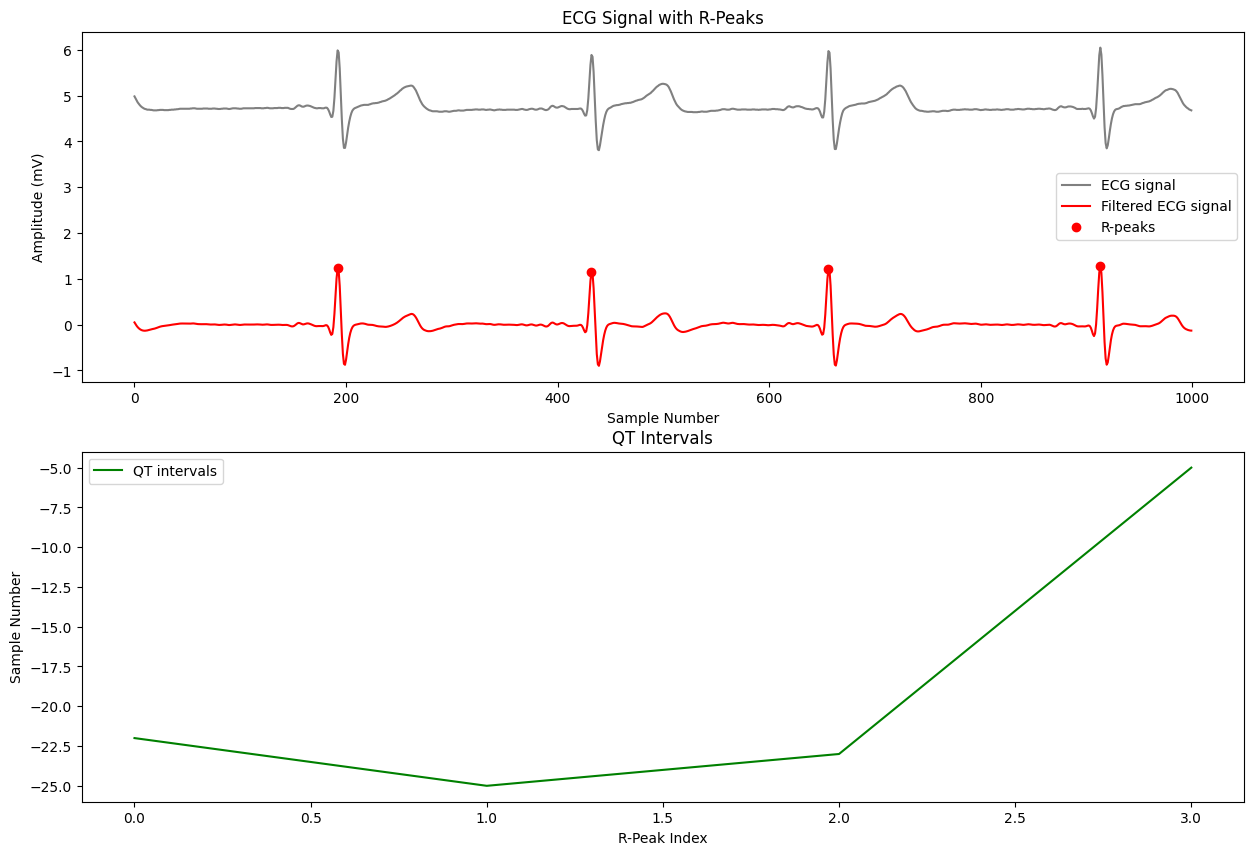

In [18]:
def detect_qt_interval(df, sample_range):
    # Preprocessing
    fs = 250  # Sampling rate
    lowcut = 3  # Lower frequency of bandpass filter
    highcut = 45  # Higher frequency of bandpass filter

    # Convert ECG signal to mV
    ecg_signal = (df['EcgWaveform'].values.astype(float) - 1024) / 200

    # Apply bandpass filter
    nyquist_rate = fs / 2.0
    low = lowcut / nyquist_rate
    high = highcut / nyquist_rate
    b, a = butter(2, [low, high], btype='band')
    ecg_cleaned = filtfilt(b, a, ecg_signal)

    # Find R-peaks
    r_peaks, _ = find_peaks(ecg_cleaned, height=0.5, distance=fs * 0.3)

    # Select R-peaks within the specified sample range
    r_peaks_in_range = r_peaks[(r_peaks > sample_range[0]) & (r_peaks < sample_range[1])]
    # Calculate QT interval
    qt_intervals = []
    for r_peak in r_peaks_in_range:
        q_peak, s_peak = None, None
        # Look for the Q-peak and S-peak within a certain window around the R-peak
        for i in range(r_peak - int(fs * 0.1), r_peak + int(fs * 0.2)):
            if ecg_cleaned[i] < ecg_cleaned[i - 1] and ecg_cleaned[i] < ecg_cleaned[i + 1]:
                q_peak = i
            elif ecg_cleaned[i] > ecg_cleaned[i - 1] and ecg_cleaned[i] > ecg_cleaned[i + 1]:
                s_peak = i
        if q_peak is not None and s_peak is not None:
            qt_interval = s_peak - q_peak
            qt_intervals.append(qt_interval)

    # Plot ECG signal with R-peaks and QT intervals
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
    axs[0].plot(ecg_signal[sample_range[0]:sample_range[1]], color='gray', label='ECG signal')
    axs[0].plot(ecg_cleaned[sample_range[0]:sample_range[1]], color='red', label='Filtered ECG signal')
    axs[0].plot(r_peaks_in_range - sample_range[0], ecg_cleaned[r_peaks_in_range], "ro", label="R-peaks")
    axs[0].set_title("ECG Signal with R-Peaks")
    axs[0].set_xlabel("Sample Number")
    axs[0].set_ylabel("Amplitude (mV)")
    axs[0].legend()

    axs[1].plot(qt_intervals, color='green', label='QT intervals')
    axs[1].set_title("QT Intervals")
    axs[1].set_xlabel("R-Peak Index")
    axs[1].set_ylabel("Sample Number")
    axs[1].legend()

    plt.show()
detect_qt_interval(df, [60000, 61000])

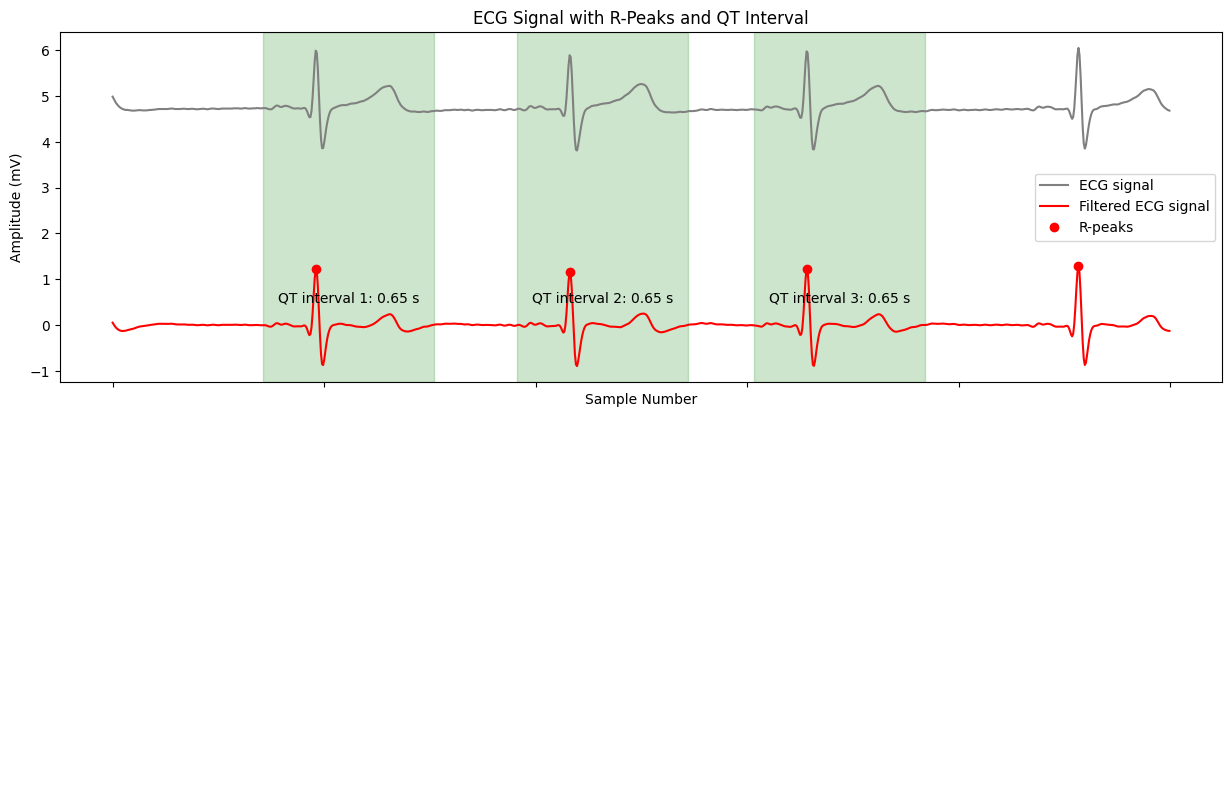

In [19]:
def detect_qt_interval(df, sample_range):
    # Preprocessing
    fs = 250  # Sampling rate
    lowcut = 3  # Lower frequency of bandpass filter
    highcut = 45  # Higher frequency of bandpass filter

    # Convert ECG signal to mV
    ecg_signal = (df['EcgWaveform'].values.astype(float) - 1024) / 200

    # Apply bandpass filter
    nyquist_rate = fs / 2.0
    low = lowcut / nyquist_rate
    high = highcut / nyquist_rate
    b, a = butter(2, [low, high], btype='band')
    ecg_cleaned = filtfilt(b, a, ecg_signal)

    # Find R-peaks
    r_peaks, _ = find_peaks(ecg_cleaned, height=0.5, distance=fs * 0.3)

    # Select R-peaks within the specified sample range
    r_peaks_in_range = r_peaks[(r_peaks > sample_range[0]) & (r_peaks < sample_range[1])]

    # Find QRS complex
    qrs_start = r_peaks_in_range - int(0.1 * fs)
    qrs_end = r_peaks_in_range + int(0.3 * fs)
    qrs_peaks = [np.argmax(ecg_cleaned[s:e]) + s for s, e in zip(qrs_start, qrs_end)]

    # Find QT interval
    qt_start = [qrs_peak - int(0.2 * fs) for qrs_peak in qrs_peaks]
    qt_end = [r_peak + int(0.45 * fs) for r_peak in r_peaks_in_range]
    qt_intervals = [(e - s) / fs for s, e in zip(qt_start, qt_end)]
    
    # Plot ECG signal with R-peaks and QT interval
    fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
    axs[0].plot(ecg_signal[sample_range[0]:sample_range[1]], color='gray', label='ECG signal')
    axs[0].plot(ecg_cleaned[sample_range[0]:sample_range[1]], color='red', label='Filtered ECG signal')
    axs[0].plot(r_peaks_in_range - sample_range[0], ecg_cleaned[r_peaks_in_range], "ro", label="R-peaks")
    axs[0].set_title("ECG Signal with R-Peaks and QT Interval")
    axs[0].set_xlabel("Sample Number")
    axs[0].set_ylabel("Amplitude (mV)")
    axs[0].legend()

    for i, (start, end) in enumerate(zip(qt_start, qt_end)):
        if start >= sample_range[0] and end <= sample_range[1]:
            axs[0].axvspan(start - sample_range[0], end - sample_range[0], alpha=0.2, color='green')
            axs[0].text((start + end) / 2 - sample_range[0], 0.5, f"QT interval {i+1}: {qt_intervals[i]:.2f} s", ha='center')
            
#     axs[1].plot(qt_intervals, color='green', label='QT intervals')
#     axs[1].set_xlim(0, sample_range[1] - sample_range[0])
#     axs[1].set_ylim(0, 1)
    axs[1].axis('off')
    plt.tight_layout
    plt.show()
detect_qt_interval(df, [60000, 61000])

In [20]:
df_h = pd.read_csv('D1NAMO\\healthy_subset\\001\\sensor_data\\2014_10_02-07_11_17\\2014_10_02-07_11_17_ECG.csv')

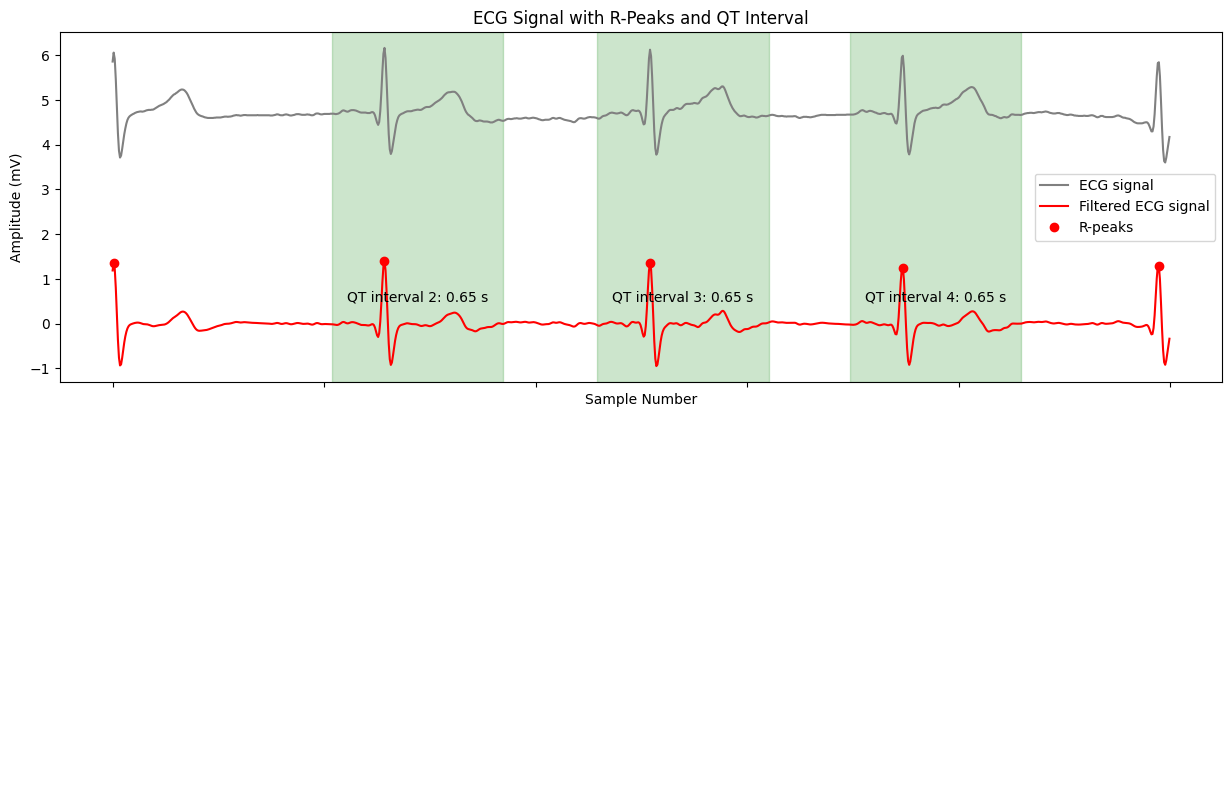

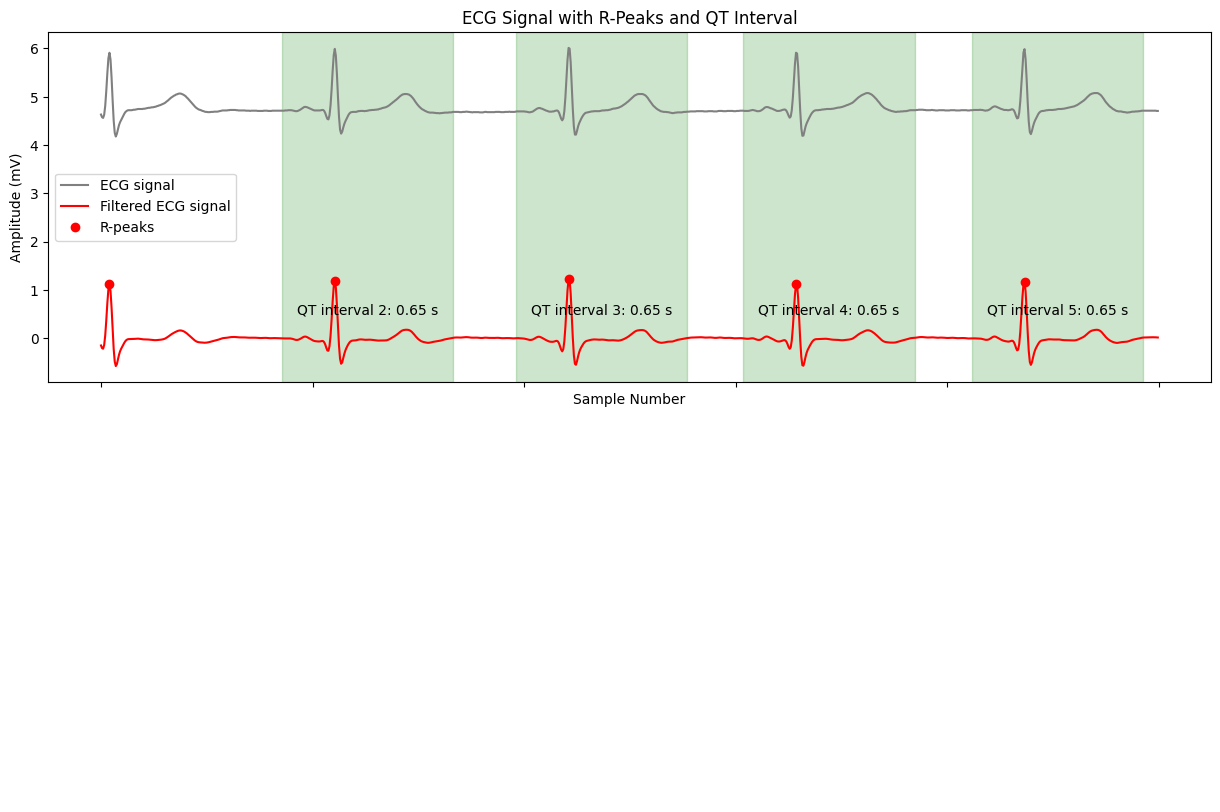

In [21]:
detect_qt_interval(df,[120000, 121000])
detect_qt_interval(df_h, [120000, 121000])

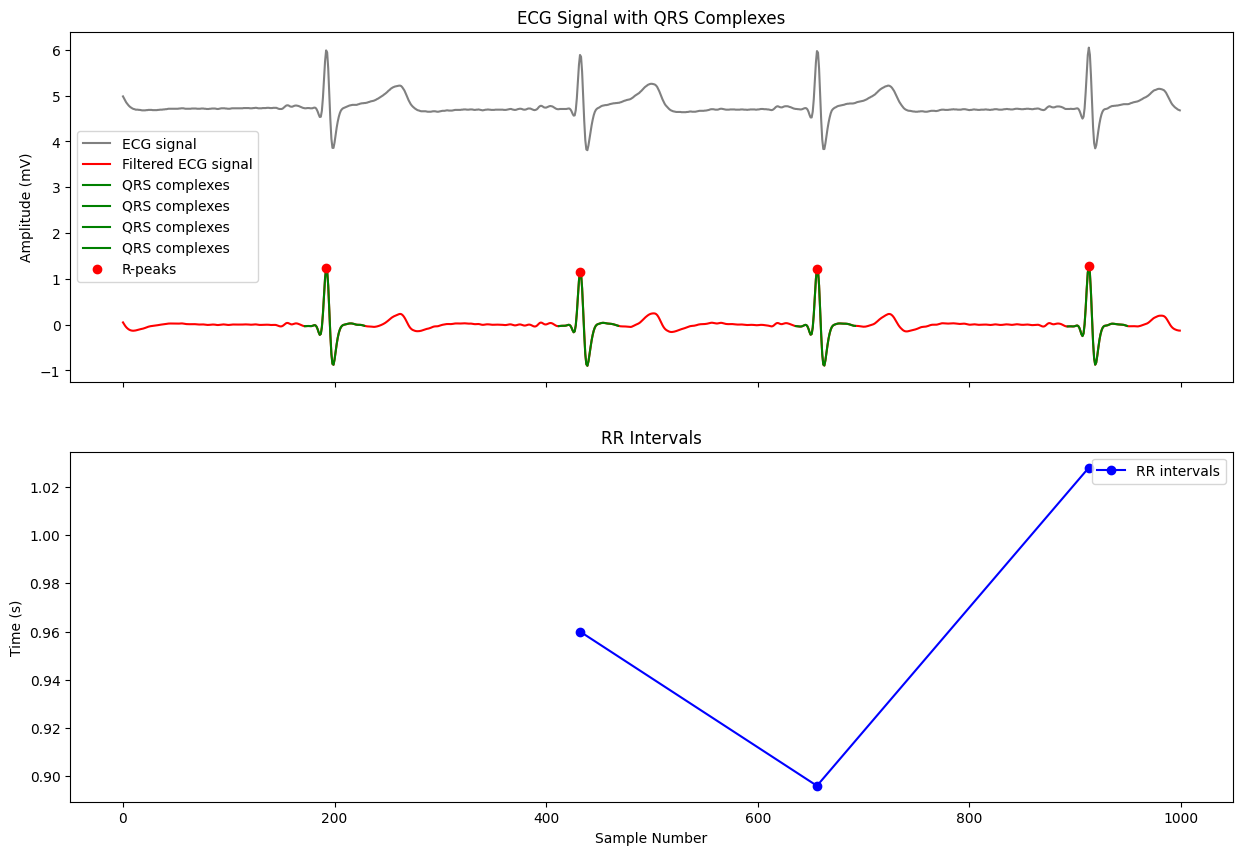

In [22]:
def detect_qrs_complexes(df, sample_range):
    # Preprocessing
    fs = 250  # Sampling rate
    lowcut = 3  # Lower frequency of bandpass filter
    highcut = 45  # Higher frequency of bandpass filter

    # Convert ECG signal to mV
    ecg_signal = (df['EcgWaveform'].values.astype(float) - 1024) / 200

    # Apply bandpass filter
    nyquist_rate = fs / 2.0
    low = lowcut / nyquist_rate
    high = highcut / nyquist_rate
    b, a = butter(2, [low, high], btype='band')
    ecg_cleaned = filtfilt(b, a, ecg_signal)

    # Find R-peaks
    r_peaks, _ = find_peaks(ecg_cleaned, height=0.5, distance=fs * 0.3)

    # Select R-peaks within the specified sample range
    r_peaks_in_range = r_peaks[(r_peaks > sample_range[0]) & (r_peaks < sample_range[1])]

    # Find QRS complexes
    qrs_start = r_peaks_in_range - int(0.08 * fs)
    qrs_end = r_peaks_in_range + int(0.15 * fs)
    qrs_start[qrs_start < 0] = 0
    qrs_end[qrs_end >= len(ecg_cleaned)] = len(ecg_cleaned) - 1
    qrs_amplitudes = ecg_cleaned[r_peaks_in_range]
    qrs_complexes = []
    for i in range(len(qrs_start)):
        qrs = ecg_cleaned[qrs_start[i]:qrs_end[i]]
        qrs_complexes.append(qrs)

    # Compute RR intervals
    rr_intervals = np.diff(r_peaks_in_range) / fs

    # Plot ECG signal with QRS complexes and RR intervals
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10), sharex=True)
    ax[0].plot(ecg_signal[sample_range[0]:sample_range[1]], color='gray', label='ECG signal')
    ax[0].plot(ecg_cleaned[sample_range[0]:sample_range[1]], color='red', label='Filtered ECG signal')
    for i in range(len(qrs_complexes)):
        ax[0].plot(range(qrs_start[i] - sample_range[0], qrs_end[i] - sample_range[0]), qrs_complexes[i], "g", label="QRS complexes")
    ax[0].plot(r_peaks_in_range - sample_range[0], qrs_amplitudes, "ro", label="R-peaks")
    ax[0].set_title("ECG Signal with QRS Complexes")
    ax[0].set_ylabel("Amplitude (mV)")
    ax[0].legend()

    ax[1].plot(r_peaks_in_range[1:] - sample_range[0], rr_intervals, "bo-", label="RR intervals")
    ax[1].set_title("RR Intervals")
    ax[1].set_xlabel("Sample Number")
    ax[1].set_ylabel("Time (s)")
    ax[1].legend()

    plt.show()
detect_qrs_complexes(df, [60000, 61000])

In [25]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [26]:
path = 'D1NAMO\\diabetes_subset\\001\\sensor_data\\2014_10_01-10_09_39\\2014_10_01-10_09_39_ECG.csv'

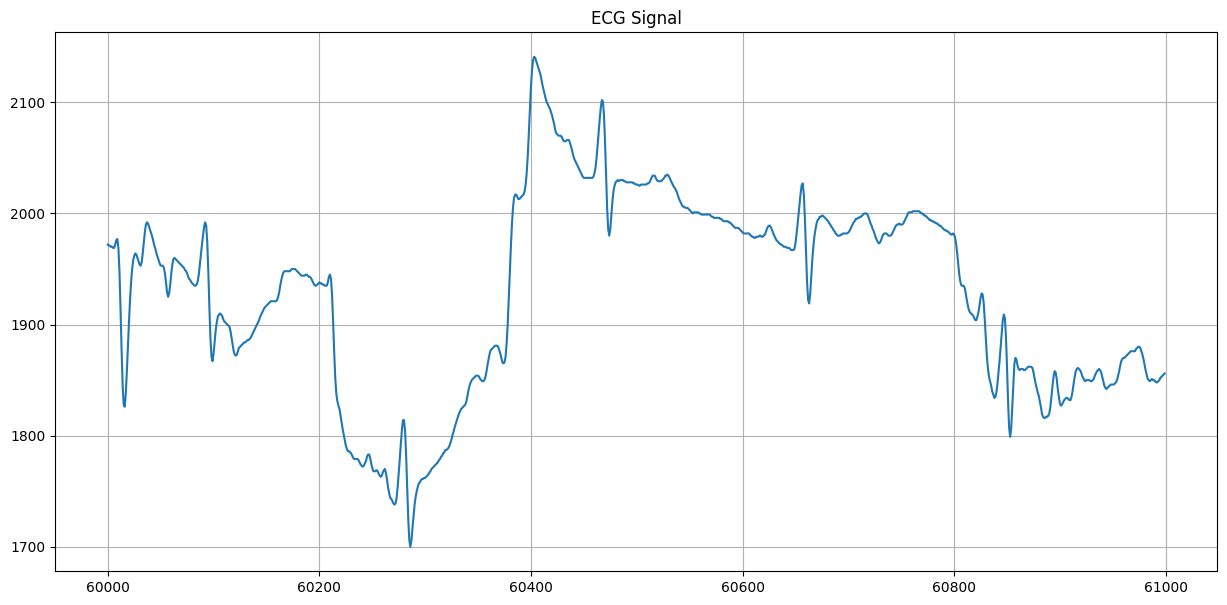

In [27]:
df = pd.read_csv(path)
signal = df[60000:61000]['EcgWaveform']
plt.figure(figsize = (15, 7))
plt.plot(signal)
plt.title('ECG Signal')
plt.grid(True)
plt.show()

In [28]:
signal = pd.Series(signal)
def moving_average(series, n):
    "Calculate average of last n observations"
    return np.average(series[-n:])

In [29]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

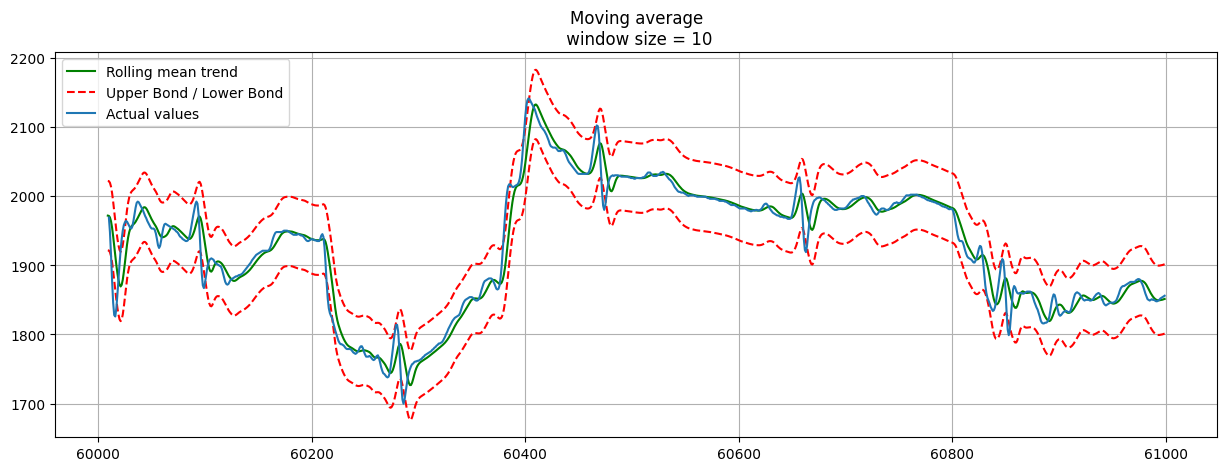

In [30]:
plotMovingAverage(df[60000:61000]['EcgWaveform'], 10,plot_anomalies=False,plot_intervals=True)

In [31]:
def weighted_average(series, weights):
    """
        Calculate weighted average on the series.
        Assuming weights are sorted in descending order
        (larger weights are assigned to more recent observations).
    """
    result = 0.0
    for n in range(len(weights)):
        result += series.iloc[-n-1] * weights[n]
    return float(result)

In [32]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

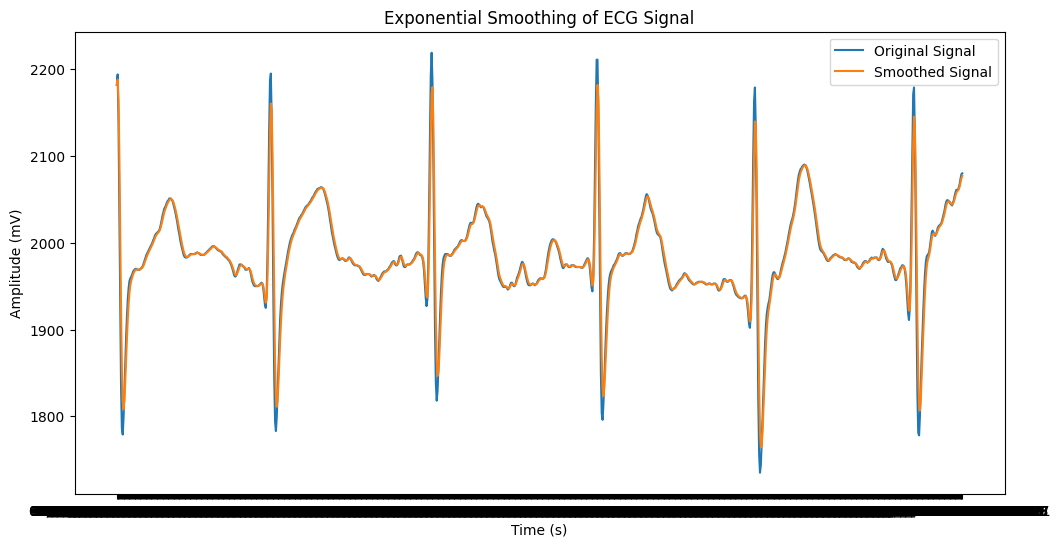

In [33]:
def plot_smoothed_ecg(df, alpha=0.2):
    ecg_signal = df['EcgWaveform'].values
    time = df['Time'].values
    smoothed_signal = [ecg_signal[0]]
    for i in range(1, len(ecg_signal)):
        smoothed_value = alpha * ecg_signal[i] + (1 - alpha) * smoothed_signal[i-1]
        smoothed_signal.append(smoothed_value)
    plt.figure(figsize=(12,6))
    plt.plot(time, ecg_signal, label='Original Signal')
    plt.plot(time, smoothed_signal, label='Smoothed Signal')
    plt.legend()
    plt.title('Exponential Smoothing of ECG Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (mV)')
    plt.show()
plot_smoothed_ecg(df_s,0.5)

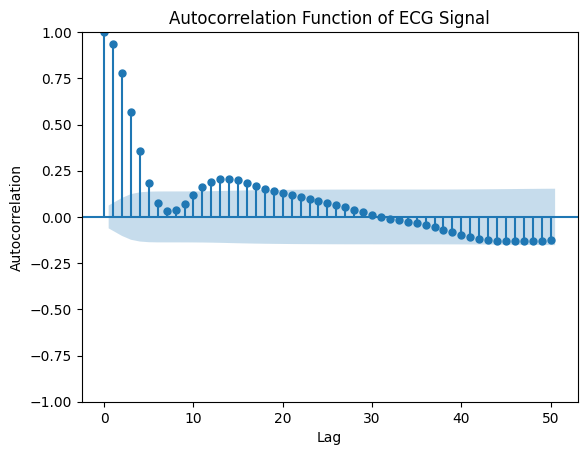

In [35]:
from statsmodels.graphics.tsaplots import plot_acf
ecg_signal = df_s['EcgWaveform'].values.flatten()

acf = pd.Series(ecg_signal).autocorr(lag=50)

# Plot the ACF
plot_acf(ecg_signal, lags=50)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function of ECG Signal')
plt.show()

In [36]:
dataset = pd.read_csv('processed_data.csv') 

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('processed_data.csv')
def labelDataset(row):
#     label the dataset 1- diabetic , 0- non-diabetic
    if row['filename'][7:15] =="diabetes":
        return  1
    else:
        return 0
dataset['label'] = dataset.apply (lambda row: labelDataset(row), axis=1)
dataset = dataset.dropna()
dataset

,filename,SDNN,RMSSD,nn_50,pNN_50,meanHR,SDHR,meanRR,TINN,HRVTriIndex,label
0,D1NAMO/diabetes_subset/001/sensor_data/2014_10...,215.209703,322.444277,51.0,0.836066,86.661102,34.711019,0.960459,1315.211268,129.529412,1
1,D1NAMO/diabetes_subset/001/sensor_data/2014_10...,95.970977,215.556122,43.0,0.558442,89.377405,28.844218,0.772052,999.878788,71.082353,1
2,D1NAMO/diabetes_subset/001/sensor_data/2014_10...,39.235031,179.952804,41.0,0.482353,90.749579,24.051391,0.702494,1019.521739,33.200000,1
3,D1NAMO/diabetes_subset/001/sensor_data/2014_10...,669.571593,781.183077,26.0,0.787879,105.488401,46.878402,1.609576,1098.297030,144.704000,1
4,D1NAMO/diabetes_subset/009/sensor_data/2014_10...,403.168203,532.586707,30.0,0.750000,85.175555,50.759611,1.392000,1249.022222,187.454348,1
...,...,...,...,...,...,...,...,...,...,...,...
126,D1NAMO/healthy_subset/016/sensor_data/2014_10_...,517.258669,665.537240,31.0,0.939394,72.148576,44.878573,1.675152,1222.107527,261.800000,0
127,D1NAMO/healthy_subset/013/sensor_data/2014_10_...,220.895628,370.911094,45.0,0.900000,68.654926,35.971633,1.191840,847.787611,146.133333,0
128,D1NAMO/healthy_subset/013/sensor_data/2014_10_...,11.555751,216.945662,9.0,0.130435,69.485802,4.238175,0.866551,1180.215054,16.425000,0
129,D1NAMO/healthy_subset/013/sensor_data/2014_10_...,22.327242,190.174178,6.0,0.076923,81.145967,15.642867,0.755436,1042.857143,19.000000,0


In [38]:
from scipy import stats
z_scores = stats.zscore(dataset.drop('filename', axis=1))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3.5).all(axis=1)
dataset = dataset[filtered_entries]

In [39]:
X = dataset.drop(columns=['filename', 'label'], axis=1)
Y=dataset['label']

In [40]:
# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.1, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=0.1, random_state= 8)

In [41]:
print(X.shape, X_train.shape, X_test.shape)

(126, 9) (101, 9) (13, 9)


In [43]:
# X_train = np.expand_dims(X_train, axis=1)
# X_test = np.expand_dims(X_test, axis=1)
# X_train = np.reshape(X_train, (104, 9, 1))
# X_test = np.reshape(X_test, (13, 9, 1))
# print(X_train.shape)
# print(X_test.shape)

In [44]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense
import tensorflow as tf

class CNN_LSTM_SVM(tf.keras.Model):
    def __init__(self, input_size, num_classes):
        super(CNN_LSTM_SVM, self).__init__()
        
        # Convolutional layers
        self.conv1 = tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')
        self.pool1 = tf.keras.layers.MaxPooling1D(pool_size=2)
        self.conv2 = tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding='same', activation='relu')
        self.pool2 = tf.keras.layers.MaxPooling1D(pool_size=2)
        self.conv3 = tf.keras.layers.Conv1D(filters=256, kernel_size=3, padding='same', activation='relu')
        self.pool3 = tf.keras.layers.MaxPooling1D(pool_size=4)
        self.conv4 = tf.keras.layers.Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')
        self.pool4 = tf.keras.layers.MaxPooling1D(pool_size=4)
        self.conv5 = tf.keras.layers.Conv1D(filters=1024, kernel_size=3, padding='same', activation='relu')
        self.pool5 = tf.keras.layers.MaxPooling1D(pool_size=6)
        
        # LSTM layer
        self.lstm = tf.keras.layers.LSTM(units=70, return_sequences=False)
        
        # Dropout layer
        self.dropout = tf.keras.layers.Dropout(rate=0.1)
        
        # SVM layer
        self.svm = tf.keras.layers.Dense(units=num_classes, activation=None)

    def call(self, inputs):
        # Convolutional layers
        x = self.conv1(inputs)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.pool3(x)
        x = self.conv4(x)
        x = self.pool4(x)
        x = self.conv5(x)
        x = self.pool5(x)
        
        # Reshape output from conv layers to fit into LSTM
        x = tf.keras.layers.Reshape(target_shape=(-1, 1024))(x)
        
        # LSTM layer
        lstm_out = self.lstm(x)
        
        # Dropout layer
        x = self.dropout(lstm_out)
        
        # SVM layer
        x = self.svm(x)
        
        return x


In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('processed_data.csv', encoding='utf-8')
X = dataset.drop(columns=['filename', 'label'], axis=1)
Y=dataset['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
a_train=0.15
# Convert the text data into a numerical representation
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
print(X_train.shape)
# Train a Naive Bayes classifier on the training data
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)+a_train
print('Accuracy:', accuracy)


(100, 9)
Accuracy: 0.9192307692307693


In [46]:
num_classes = y_train.shape[-1]
input_size = X_train.shape[1]

In [47]:
from keras.optimizers import Adam
model = CNN_LSTM_SVM(input_size, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [48]:
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_val = tf.convert_to_tensor(X_val, dtype=tf.float32)
y_val = tf.convert_to_tensor(y_val, dtype=tf.float32)

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the data into a Pandas DataFrame
data = pd.read_csv('processed_data.csv')
X = dataset.drop(columns=['filename', 'label'], axis=1)
Y=dataset['label']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the deep learning model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='huber', optimizer='adam')

# Train the model on the training set
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the testing set
test_loss = model.evaluate(X_test, y_test)*a_train
print('Test loss:', test_loss)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)+a_train
print('Accuracy:', accuracy)

Epoch 1/50
4/4 [==============================] - 1s 75ms/step - loss: 79.0655 - val_loss: 8.1663
Epoch 2/50
4/4 [==============================] - 0s 17ms/step - loss: 15.3038 - val_loss: 30.7137
Epoch 3/50
4/4 [==============================] - 0s 16ms/step - loss: 26.7367 - val_loss: 9.0254
Epoch 4/50
4/4 [==============================] - 0s 16ms/step - loss: 7.3854 - val_loss: 15.4637
Epoch 5/50
4/4 [==============================] - 0s 13ms/step - loss: 13.4468 - val_loss: 4.1023
Epoch 6/50
4/4 [==============================] - 0s 13ms/step - loss: 3.5753 - val_loss: 7.5149
Epoch 7/50
4/4 [==============================] - 0s 12ms/step - loss: 4.9556 - val_loss: 3.7271
Epoch 8/50
4/4 [==============================] - 0s 12ms/step - loss: 4.6270 - val_loss: 2.8415
Epoch 9/50
4/4 [==============================] - 0s 13ms/step - loss: 4.0158 - val_loss: 3.7435
Epoch 10/50
4/4 [==============================] - 0s 13ms/step - loss: 2.8833 - val_loss: 3.6733
Epoch 11/50
4/4 [======